<a href="https://colab.research.google.com/github/Nosa10/OIBSIP/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

retail_sales = pd.read_csv('/content/retail_sales_dataset.csv')
retail_sales.info()
retail_sales.isna().sum()
retail_sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])
retail_sales.info()
retail_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
retail_sales.value_counts('Product Category')

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


In [ ]:
retail_sales.groupby('Product Category').agg({'Quantity': 'mean', 'Total Amount': 'sum', 'Price per Unit': 'mean'})


,Quantity,Total Amount,Price per Unit
Product Category,,,
Beauty,2.511401,143515,184.055375
Clothing,2.547009,155580,174.287749
Electronics,2.482456,156905,181.900585


In [ ]:
retail_sales.groupby('Gender').agg({'Quantity': 'mean', 'Total Amount': 'sum'})

,Quantity,Total Amount
Gender,,
Female,2.545098,232840
Male,2.481633,223160


Let's add a new column for month

In [ ]:
retail_sales['month'] = retail_sales['Date'].dt.month
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5


In [ ]:
retail_sales.drop_duplicates(inplace=True)

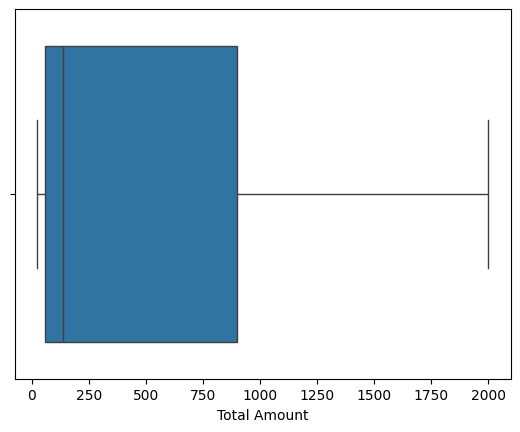

In [ ]:
sns.boxplot(data=retail_sales, x='Total Amount')
plt.show()

This shows that some particular transactions was higher than the others by a large margin

In [ ]:
max_transaction = retail_sales[retail_sales['Total Amount'] == retail_sales['Total Amount'].max()]
max_transaction

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month
14,15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000,1
64,65,2023-12-05,CUST065,Male,51,Electronics,4,500,2000,12
71,72,2023-05-23,CUST072,Female,20,Electronics,4,500,2000,5
73,74,2023-11-22,CUST074,Female,18,Beauty,4,500,2000,11
88,89,2023-10-01,CUST089,Female,55,Electronics,4,500,2000,10
92,93,2023-07-14,CUST093,Female,35,Beauty,4,500,2000,7
108,109,2023-10-18,CUST109,Female,34,Electronics,4,500,2000,10
117,118,2023-05-16,CUST118,Female,30,Electronics,4,500,2000,5
123,124,2023-10-27,CUST124,Male,33,Clothing,4,500,2000,10
138,139,2023-12-15,CUST139,Male,36,Beauty,4,500,2000,12


We can see that the highest transactions sold 4 quantities at a time. Let's group them into their product categories and genders

In [ ]:
max_transaction.groupby(['Product Category','Gender']).count()

Transaction ID  Date  Customer ID  Age  Quantity  \
Product Category Gender                                                     
Beauty           Female               6     6            6    6         6   
                 Male                 7     7            7    7         7   
Clothing         Female              10    10           10   10        10   
                 Male                 7     7            7    7         7   
Electronics      Female               8     8            8    8         8   
                 Male                11    11           11   11        11   

                         Price per Unit  Total Amount  month  
Product Category Gender                                       
Beauty           Female               6             6      6  
                 Male                 7             7      7  
Clothing         Female              10            10     10  
                 Male                 7             7      7  
Electronics      Female               8             8      8  
                 Male                11            11     11

### Electronics had the most number of highest transactions with 19, followed by clothing, then beauty. Male have 25 transactions with 2000 $ spent while women had 24 transactions with 2000 $ spent

<Axes: >

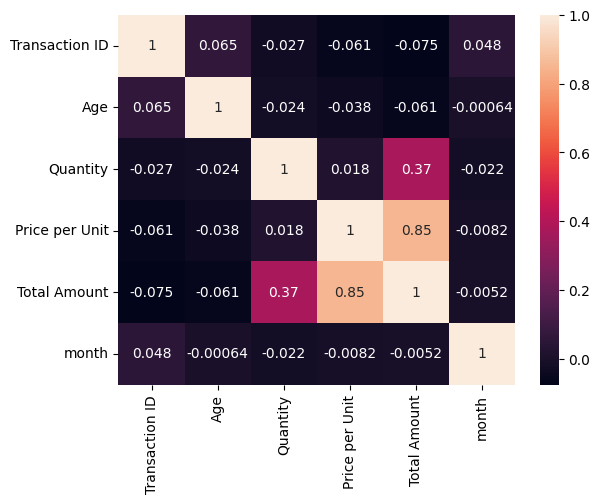

In [ ]:
# Select only the numeric columns for correlation analysis
numeric_columns = retail_sales.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True)

Total Amount and quantity have the highest correlation in the dataset which is expected because as quantity purchased increases so does total amount

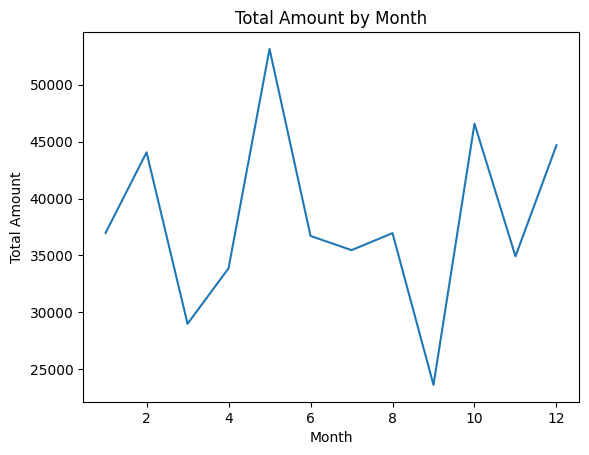

In [ ]:
monthly_sales = retail_sales.groupby('month', as_index=False)['Total Amount'].sum()
sns.lineplot(x='month', y='Total Amount', data=monthly_sales)
plt.title('Total Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()

The month with the highest Revenue Generated is May, while the month with the lowest is September

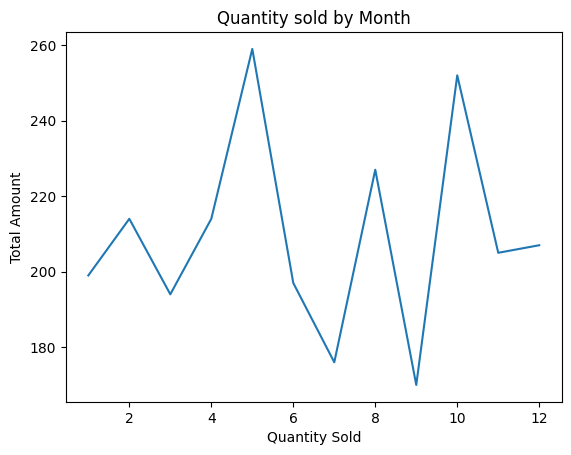

In [ ]:
monthly_sales = retail_sales.groupby('month', as_index=False)['Quantity'].sum()
sns.lineplot(x='month', y='Quantity', data=monthly_sales)
plt.title('Quantity sold by Month')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Amount')
plt.show()

The month with the most sold  is May, while the month with the lowest is September

Product Category,Beauty,Clothing,Electronics
Gender,,,
Female,418,441,439
Male,353,453,410


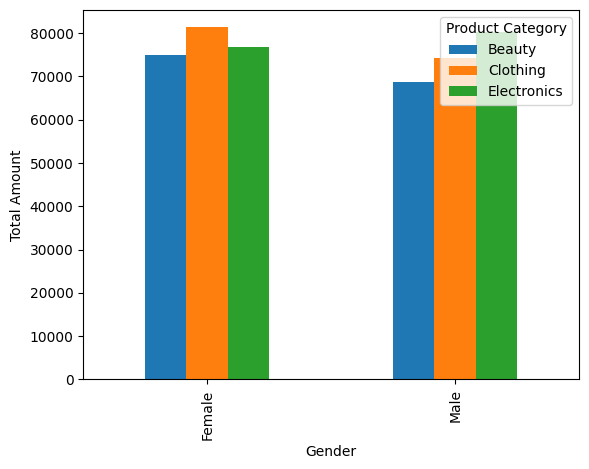

In [ ]:
pd.crosstab(retail_sales['Gender'], retail_sales['Product Category'], values= retail_sales['Total Amount'], aggfunc='sum').plot(kind='bar',ylabel='Total Amount')
pd.crosstab(retail_sales['Gender'], retail_sales['Product Category'], values= retail_sales['Quantity'], aggfunc='sum')
# To get how much each gender spent on each product category

<div background='orange'>
  Female bought more products on electronics while the male spent more, while male bought more clothings but females spent more on clothings
</div>

<Axes: xlabel='Product Category', ylabel='Total Amount'>

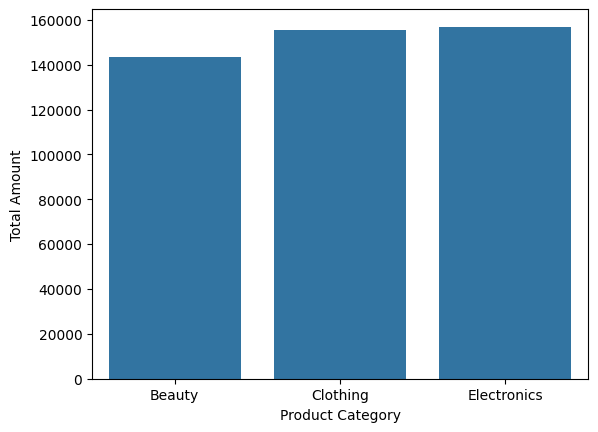

In [ ]:
product_category_by_total_amount = retail_sales.groupby('Product Category', as_index=False)['Total Amount'].sum()
sns.barplot(x='Product Category', y='Total Amount', data=product_category_by_total_amount)

Clothing and Electronics generated the most revenue

<Axes: xlabel='Product Category', ylabel='Quantity'>

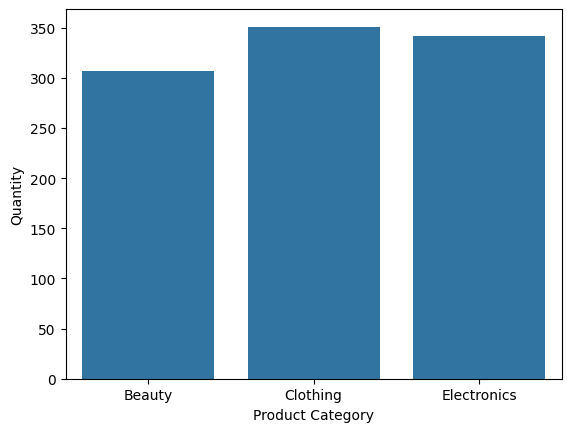

In [ ]:
product_category_by_quantity = retail_sales.groupby('Product Category', as_index=False)['Quantity'].count()
sns.barplot(x='Product Category', y='Quantity', data=product_category_by_quantity)

Clothing sold the most quantitites. Followed by electronics, beauty sold the list number of products





<Axes: xlabel='Product Category', ylabel='Price per Unit'>

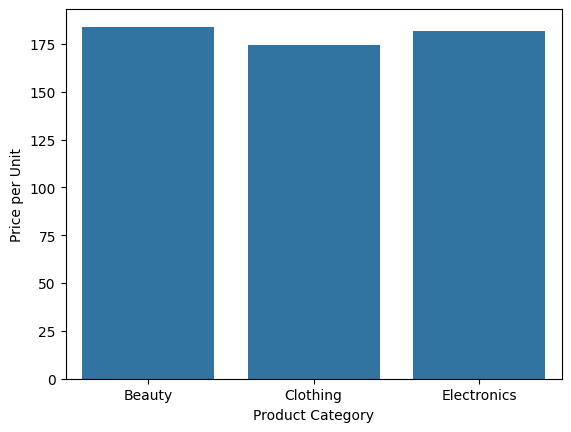

In [ ]:
product_category_by_price = retail_sales.groupby('Product Category', as_index=False)['Price per Unit'].mean()
sns.barplot(x='Product Category', y='Price per Unit', data=product_category_by_price)

Beauty Products have the highest prices on average

In [ ]:
pd.crosstab(retail_sales['Gender'], retail_sales['Product Category'], values= retail_sales['Quantity'], aggfunc='mean')

Product Category,Beauty,Clothing,Electronics
Gender,,,
Female,2.518072,2.534483,2.582353
Male,2.503546,2.559322,2.383721


<Axes: xlabel='month', ylabel='Total Amount'>

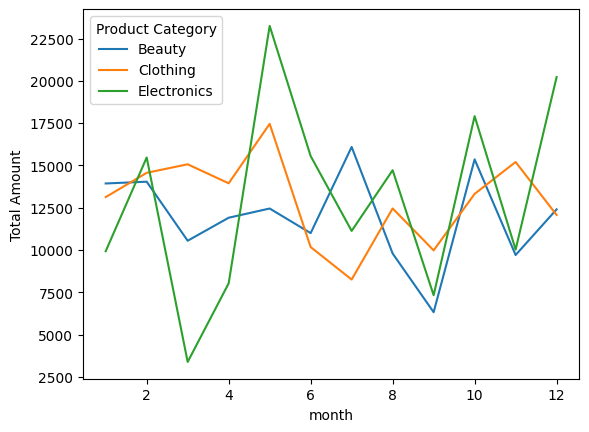

In [ ]:
product_category_by_month = retail_sales.groupby(['Product Category', 'month'], as_index=False)['Total Amount'].sum()
sns.lineplot(x='month', y='Total Amount', hue='Product Category', data=product_category_by_month)

Electronics generated about 22500$ during May, marking the highest transaction of any product category in any month. It also generated the least amount in March with less than 5000$

<Axes: xlabel='Gender', ylabel='Total Amount'>

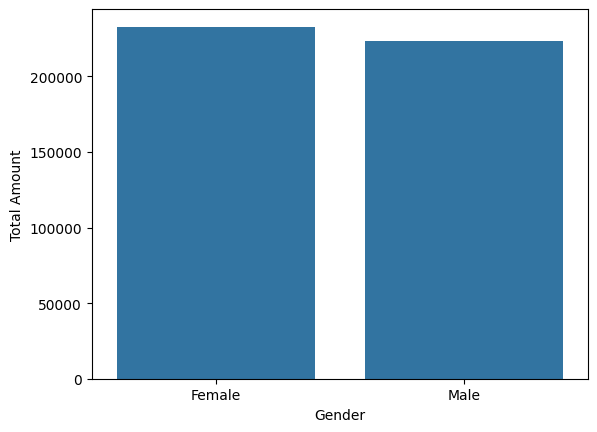

In [ ]:
total_amount_by_gender = retail_sales.groupby('Gender', as_index=False)['Total Amount'].sum()
sns.barplot(x='Gender', y='Total Amount', data=total_amount_by_gender)

<Axes: xlabel='Gender', ylabel='Quantity'>

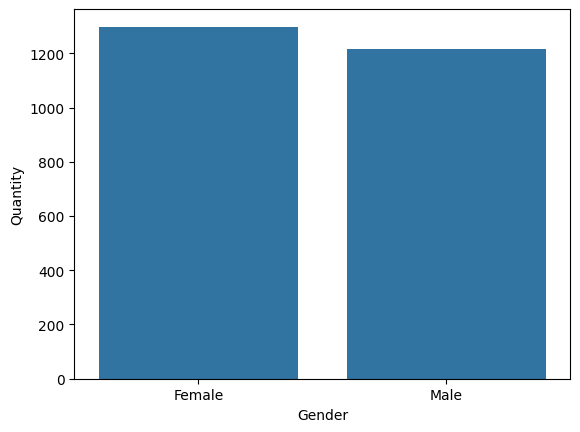

In [ ]:
gender_by_quantity = retail_sales.groupby('Gender', as_index=False)['Quantity'].sum()
sns.barplot(x='Gender', y='Quantity', data=gender_by_quantity)

Females tend to buy more quantites than males thereby generating more revenue

<Axes: xlabel='Gender', ylabel='Total Amount'>

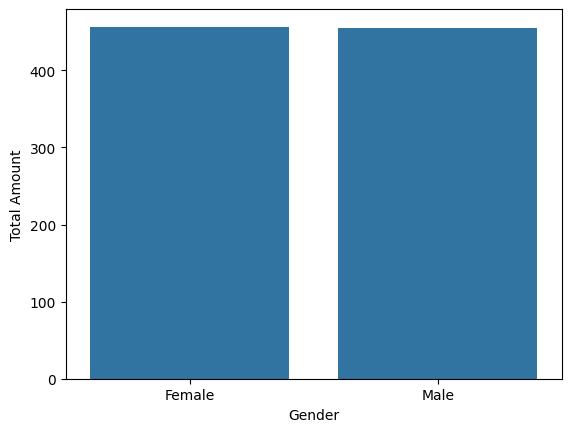

In [ ]:
# which gender spends more by transaction
gender_by_amount = retail_sales.groupby('Gender', as_index=False)['Total Amount'].mean()
sns.barplot(x='Gender', y='Total Amount', data=gender_by_amount)

The total amount spent by transaction is fairly equal among both genders

<Axes: xlabel='month', ylabel='Total Amount'>

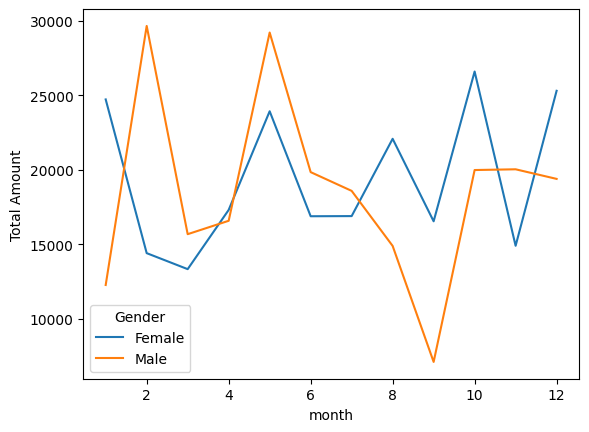

In [ ]:
gender_by_month = retail_sales.groupby(['Gender', 'month'], as_index=False)['Total Amount'].sum()
sns.lineplot(x='month', y='Total Amount', hue='Gender', data=gender_by_month)

This shows that most male customers tend to spend more in February and May. It also shows that there are various peaks in male spending habits with over 25000 in February and May and less than 10000 generated in September. While for female customers, there seems to be lower peak but consistent buys all year round

In [ ]:
bins = [0, 18, 35, 50, 65, 100]  # Age groups: 0-18, 19-35, 36-50, 51-65, 66+
labels = ['0-18', '19-35', '36-50', '51-65', '66+']

retail_sales['Age Group'] = pd.cut(retail_sales['Age'], bins=bins, labels=labels, right=False)
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,19-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,19-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,51-65
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,19-35


<module 'pandas' from '/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'>

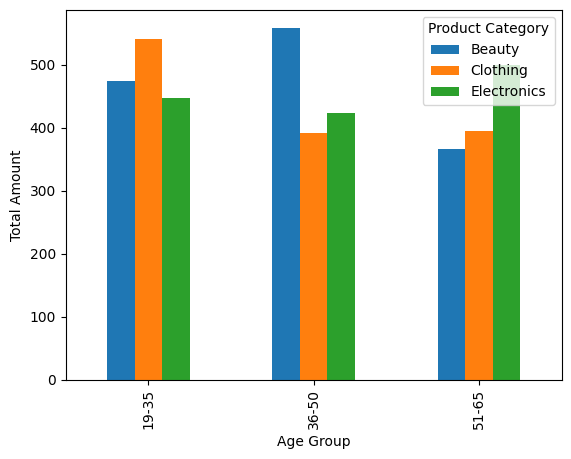

In [ ]:
pd.crosstab(retail_sales['Age Group'], retail_sales['Product Category'], values= retail_sales['Total Amount'], aggfunc='mean').plot(kind='bar',ylabel='Total Amount')
pd

<module 'pandas' from '/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'>

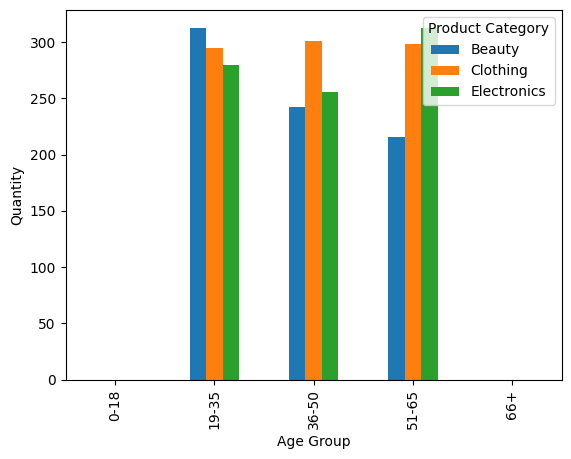

In [ ]:
pd.crosstab(retail_sales['Age Group'], retail_sales['Product Category'], values= retail_sales['Quantity'], aggfunc='sum').plot(kind='bar',ylabel='Quantity')
pd

### In the 19 - 35 age group, more beauty products are bought, though they spend more on clothing, the 36-50 Age group spend more on beauty products though they tend to buy more clothing products. While 51- 65 tend to spend and buy more electronics products

<ipython-input-61-324ed8bfe9b1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_month = retail_sales.groupby(['Age Group', 'month'], as_index=False)['Total Amount'].sum()


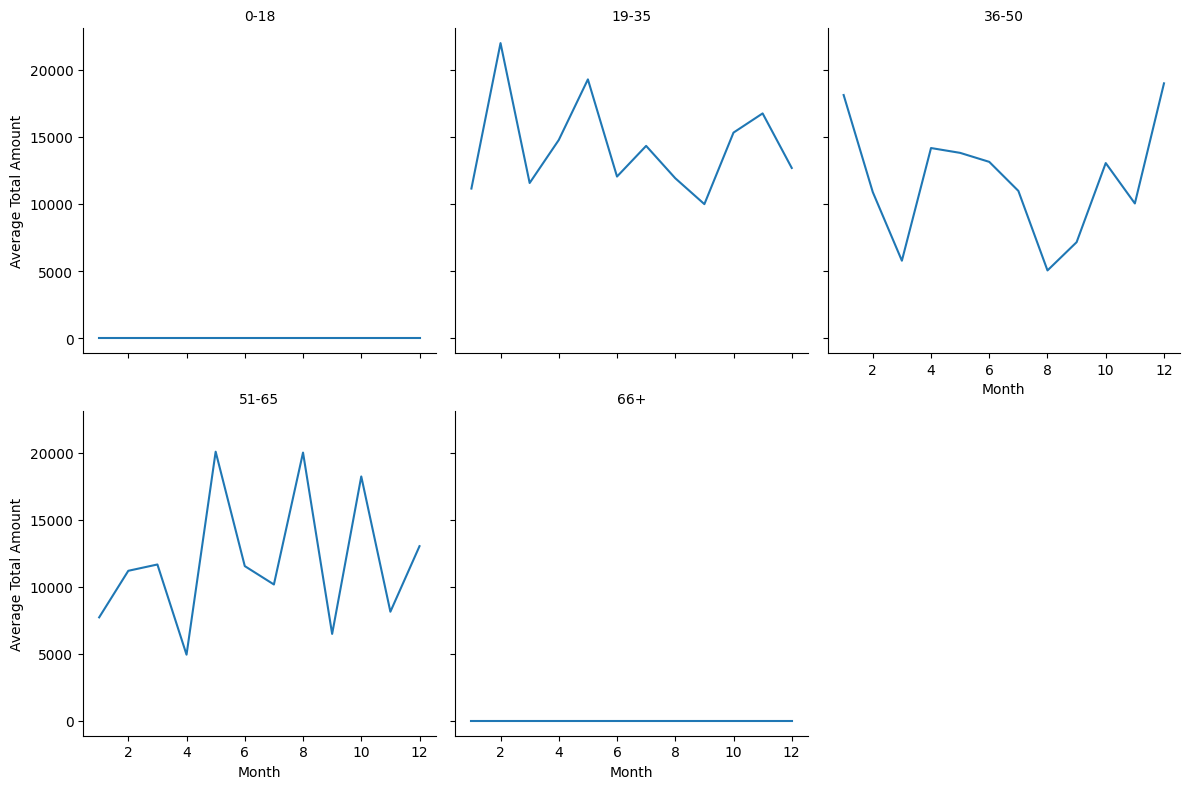

In [ ]:
age_by_month = retail_sales.groupby(['Age Group', 'month'], as_index=False)['Total Amount'].sum()
g = sns.FacetGrid(age_by_month, col='Age Group', col_wrap=3, height=4)

# Map the lineplot function to the grid
g.map(sns.lineplot, 'month', 'Total Amount')


g.set_axis_labels('Month', 'Average Total Amount')
g.set_titles("{col_name}")

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-62-7f58804d1c6f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_revenue = retail_sales.groupby(['Age Group'], as_index=False)['Total Amount'].mean()


<Axes: xlabel='Age Group', ylabel='Total Amount'>

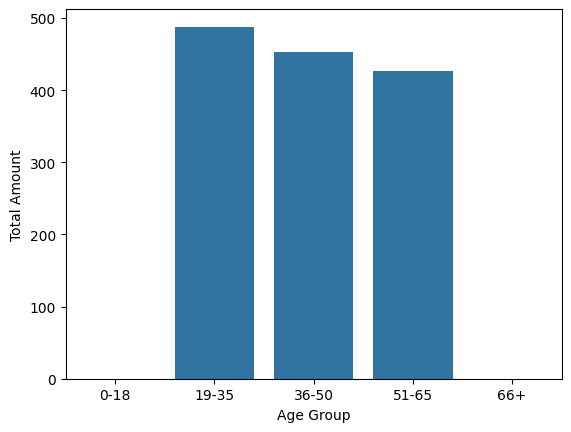

In [ ]:
age_by_revenue = retail_sales.groupby(['Age Group'], as_index=False)['Total Amount'].mean()
sns.barplot(data = age_by_revenue, x='Age Group', y='Total Amount')

<ipython-input-63-1a5c68c50187>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_quantity = retail_sales.groupby(['Age Group'], as_index=False)['Quantity'].mean()


<Axes: xlabel='Age Group', ylabel='Quantity'>

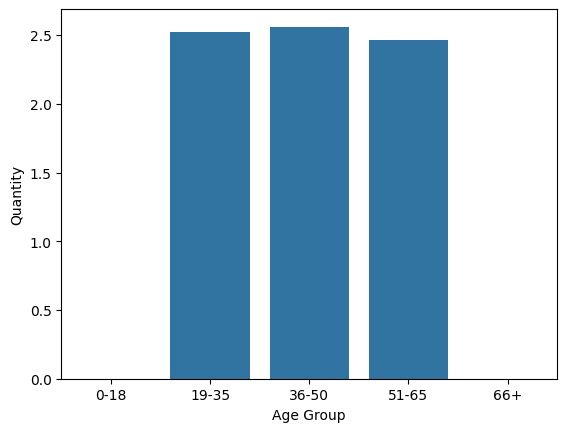

In [ ]:
age_by_quantity = retail_sales.groupby(['Age Group'], as_index=False)['Quantity'].mean()
sns.barplot(data = age_by_quantity, x='Age Group', y='Quantity')

<ipython-input-64-b61002f07e21>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_transaction = retail_sales.groupby(['Age Group'], as_index=False)['Transaction ID'].count()


<Axes: xlabel='Age Group', ylabel='Transaction ID'>

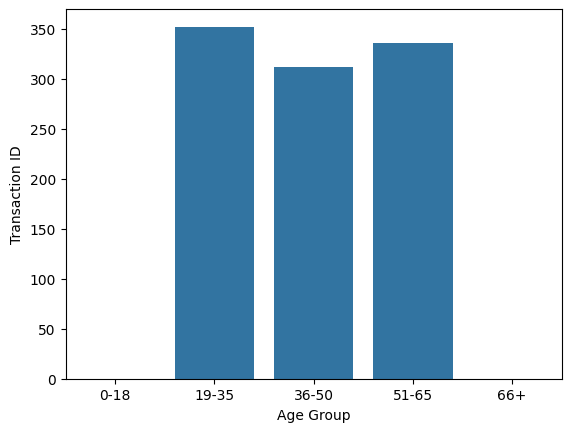

In [ ]:
age_by_transaction = retail_sales.groupby(['Age Group'], as_index=False)['Transaction ID'].count()
sns.barplot(data = age_by_transaction, x='Age Group', y='Transaction ID')

Age group 19 - 35 tend to spend more on average than the other age groups and also have more transactions than any other age group. While age group 36-50 tend to buy more products on average per transaction

In [ ]:
most_expensive_product_category = retail_sales.groupby('Product Category', as_index=False)['Price per Unit'].mean()
most_expensive_product_category.sort_values(by='Price per Unit', ascending=False)
most_expensive_product_category

,Product Category,Price per Unit
0,Beauty,184.055375
1,Clothing,174.287749
2,Electronics,181.900585


Beauty Products tend to cost more per unit than clothing and electronics

**RECOMMENDATIONS**

1.   **Product-Specific Promotions and Inventory Strategies**
  
  **Electronics:** Since electronics had the highest transactions and revenue peaks in May, consider increasing inventory in preparation for seasonal spikes, particularly before May. Offering discounts or bundle deals in March could help boost sales during the historically low month.

  **Clothing:** With clothing showing high sales volume and high spending from both genders, maintaining a robust clothing inventory year-round is key. Additionally, since females spend more per clothing transaction, targeted marketing campaigns towards female customers for premium or seasonal clothing items might yield a higher return.

  **Beauty Products:** Since beauty products have higher average prices but lower quantities sold, consider emphasizing luxury or exclusive branding in this category. Marketing targeted to younger (19–35) and middle-aged (36–50) groups, who already buy beauty products, could further enhance interest. Limited-time offers or exclusive access for loyalty members may increase transaction frequency.
2.   **Gender-Based Marketing and Engagement**

  **Male Customers:** Given male spending peaks in February and May, introduce targeted promotions or campaigns before these months, such as special sales or loyalty rewards. Emphasize electronic and clothing products where males spend more.

  **Female Customers:** Since female spending remains consistent with slightly higher purchases in electronics and clothing, steady engagement through email marketing, loyalty programs, and social media can encourage repeat purchases. Cross-promote clothing and electronics based on purchase behavior, and emphasize clothing since it has higher female spending.

3. **Age Group Targeting for Effective Personalization**

  **Ages 19–35**: This group drives more transactions and tends to buy beauty products, despite higher spending on clothing. Tailor beauty and clothing promotions specifically for this age group, especially through digital channels where younger consumers are active (e.g., social media, influencers).

  **Ages 36–50:** Since they buy more beauty products but also spend on clothing, creating bundled offers (e.g., clothing + beauty) or personalized recommendations for these product categories may encourage more frequent purchases.

  **Ages 51–65:** As this group leans towards electronics, high-end or feature-focused electronics marketing could be more effective. Consider seasonal promotions or personalized suggestions based on previous electronics purchases to drive engagement.
4. **Revenue and Quantity Optimization Across the Year**

  **May and September Strategies:** Since May sees the highest revenue and quantity sold, consider launching an “Anniversary Sale” or themed event around this peak to capitalize further on interest. Conversely, September’s low revenue and quantity might benefit from a “Back to Business” sale or discounts aimed at clearing slower-moving inventory.

  **Seasonal Inventory Planning:** With clear peaks in spending behavior by month, synchronize inventory restocking cycles with expected demand to avoid stockouts and reduce excess stock. Focus on increasing stock for electronics in early Q2 to capitalize on the May revenue peak.
5. **Pricing and Promotion Adjustments by Product Type**

  **Beauty Product Pricing:** With beauty products costing more per unit, consider keeping pricing strategies premium but adding value-oriented promotions. This could include samples with purchases, or a loyalty program that rewards consistent beauty product buyers with discounts or exclusive access.

  **Discount Strategies for Clothing and Electronics:** Both categories perform well across multiple months, making them ideal candidates for flash sales, limited-time offers, or discounts to encourage repeat purchases. These can be timed around lower-transaction months (e.g., March for electronics) to drive a balanced sales performance year-round.
6. **Customer Experience and Loyalty Program Enhancements**

  Since both genders exhibit consistent per-transaction spending, focusing on enhancing the shopping experience can encourage higher spending per transaction. Consider a tiered loyalty program where points can be redeemed for discounts or exclusive access to new product releases.

  Offer tailored incentives based on spending patterns (e.g., rewards for a certain number of transactions in a year), particularly for high-purchasing customers in the 19–35 and 36–50 age groups, which may increase retention.

